# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

- What is the expected value of a single die roll? 
$$
\mathbb{E}[X] = \frac{1}{6}1+\frac{1}{6}2+\frac{1}{6}3+\frac{1}{6}4+\frac{1}{6}5+\frac{1}{6}6 = \frac{21}{6}
$$

- What is the expected value of rolling two dice and adding the results together?
$$
\mathbb{E}[X] = 
\frac{1}{36}2 +
\frac{2}{36}3 +
\frac{3}{36}4 +
\frac{4}{36}5 +
\frac{5}{36}6 +
\frac{6}{36}7 +
\frac{5}{36}8 +
\frac{4}{36}9 +
\frac{3}{36}10 +
\frac{2}{36}11 +
\frac{1}{36}12 = \frac{252}{36}
$$
which is 7.

- What is the expected winnings of any gamble in European roulette?
Well, it's interesting. You pay one dollar for sure to bet on $K$ slots, and with probability $K/37$ you win and get $36/K$ dollars as payoff, but with $(37-K)/37$ you get nothing back. So the expected payoff is:
\begin{alignat*}{2}
\mathbb{E}[X] &=& \frac{K}{37}  \frac{36}{K} + \dfrac{37-K}{37}0 -1 \\
&=& \frac{36}{37} -1 \\
&=& -0.027
\end{alignat*}
So any roulette bet gives the same payoff of -.03.

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
$$
\mathbb{E}[X] = \dfrac{1}{6}1+\dfrac{1}{6}2+\dfrac{1}{6}3+\dfrac{1}{6}4+\dfrac{1}{6}5+\dfrac{1}{6}\left(6 + \dfrac{1}{6}1+\dfrac{1}{6}2+\dfrac{1}{6}3+\dfrac{1}{6}4+\dfrac{1}{6}5+\dfrac{1}{6}6 \right)
$$
Well this is 
$$
\mathbb{E}[X] = \dfrac{1}{6}1+\dfrac{1}{6}2+\dfrac{1}{6}3+\dfrac{1}{6}4+\dfrac{1}{6}5+\dfrac{1}{6}\left(6 + 3.5\right)
$$
or
$$
\mathbb{E}[X] = 3.5+\dfrac{3.5}{6} = \frac{24.5}{6} \approx 4.083
$$

- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

You can definitely simulate this, but the cute way to handle this is to recognize that it recurses on itself: If you roll a 6, you get 6 + "do it again". Let's call "do it again" the value $J$. Then
$$
J = \dfrac{1}{6}1+\dfrac{1}{6}2+\dfrac{1}{6}3+\dfrac{1}{6}4+\dfrac{1}{6}5+\dfrac{1}{6}(6 + J)
$$
or
$$
J = \frac{21}{6} + \frac{1}{6}J
$$
or
$$
J = \dfrac{21}{5} \approx 4.2
$$
So, in expectation, goes from about 3.5 for a single die roll to 4.2 for the process. Let's simulate:

Simulated value of the process: 4.19602


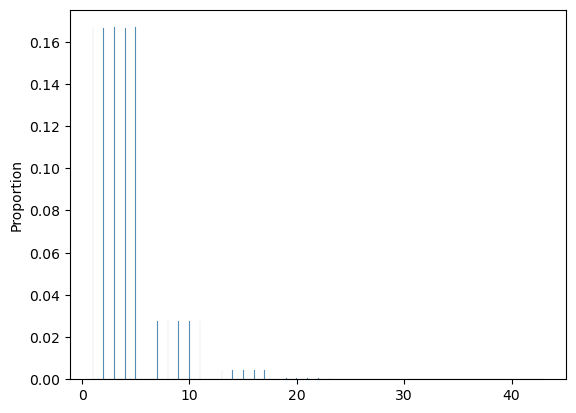

In [5]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def simulate():
    sum = 0
    on = 1
    while on == 1:
        roll = rng.integers(1,7)
        sum += roll
        if( roll < 6 ):
            on = 0
    return sum

n_sample = 1000000
results = [simulate() for i in range(n_sample)]

sns.histplot(results,stat='proportion')

print(f'Simulated value of the process: {np.mean(results)}')


So we get approximately the same answer.

## 2. 
- Compute the expected value for a uniform random variable.
We have to solve
$$
\int_0^1 x \times 1 dx =  \int_0^1 d \left\lbrace \frac{1}{2} x^2 \right\rbrace = \frac{1}{2}1^2 - \frac{1}{2}0^2 = \frac{1}{2}
$$
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
This is basically a property of the integral:
$$
\mathbb{E}[a+bX] = \int_{-\infty}^{+\infty} (a + bx)f(x)dx = \int_{-\infty}^{+\infty} af(x) + bxf(x)dx = a \int_{-\infty}^{+\infty} f(x)dx + b \int_{-\infty}^{+\infty} xf(x)dx =a + b \mathbb{E}[X]
$$
since $ \int_a^b f(x) dx = F(b) - F(a)$, and $F(-\infty)=0$ and $F(+\infty)=1$.


- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

Expected Value: 0.6687293969358721
Value of Expectation: 0.7089333728875228


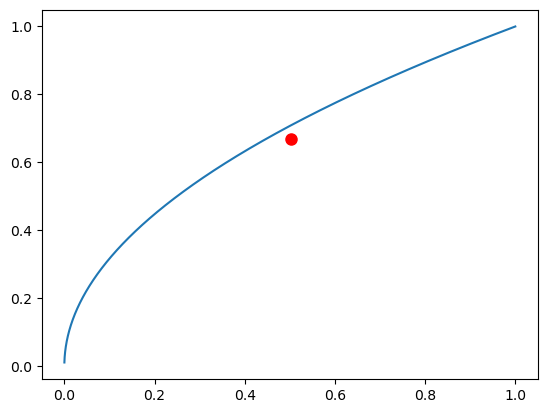

In [28]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

def v(x):
    return np.sqrt(x)

sample = np.random.uniform(low=0, high=1,size = 20000)

Ev_of_sample = np.mean( v(sample) )
print(f'Expected Value: {Ev_of_sample}')

v_of_EX = v(np.mean(sample))
print(f'Value of Expectation: {v_of_EX}')

sns.lineplot(x=sample, y=v(sample))
plt.plot(np.mean(sample),Ev_of_sample, 'o', color='red', markersize=8)


So the expected value of $\sqrt{x}$ for a uniformly distributed variable over $[0,1]$ is about .6687, while $v(\mathbb{E}[X]) = \sqrt{.5} \approx .7089$.

We can do this calculation explicitly:
$$
\int_{0}^{1} \sqrt{x} dx =  \int_{0}^{1} d\left\lbrace \frac{2}{3}x^{3/2} \right\rbrace  = \dfrac{2}{3} \approx .6687
$$
versus
$$
\sqrt{\int_{0}^{1} x dx} =  \sqrt{.5} \approx .7089.
$$
These are fundamentally different things. There's an inequality that is generally useful here, called **Jensen's Inequality**.


## 3. 
- Compute the variance for a uniform random variable.
We know from Q2 that the expecation is .5, so
$$
\int_0^1 (x-.5)^2 \times 1 dx = \int_0^1 x^2 - x + .25 dx = \int_0^1 d\left\lbrace \frac{1}{3} x^3 - \frac{1}{2}x^2 + .25x \right\rbrace = \frac{1}{3}-\frac{1}{2}+\frac{1}{4} = \frac{1}{12}
$$

- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
Ah, a classic.
\begin{alignat*}{2}
\mathbb{V}[X] &=& \int (x-\mathbb{E}[X])^2 f(x) dx \\
&=& \int (x^2 - 2 x \mathbb{E}[X] + \mathbb{E}[X]^2 ) f(x) dx \\
&=& \int x^2 f(x)dx - 2 \int xf(x)dx \mathbb{E}[X] + \mathbb{E}[X]^2\\
&=& \mathbb{E}[X^2] - 2 \mathbb{E}[X]^2 + \mathbb{E}[X]^2\\
&=& \mathbb{E}[X^2] - \mathbb{E}[X]^2\\
\end{alignat*}
This a really helpful fact to remember. It's somewhat easier to compute the expectation of $X^2$ and the expectation of $X$, squared, than it is to compute the variance directly.

- Show that 
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
We just work out the definitions:
\begin{alignat*}{2}
\mathbb{V}[a+bX] &=& \int (a+bX - \mathbb{E}[a+bX])^2 f(x)dx \\
&=& \int (a+bX - a - b \mathbb{E}[X])^2 f(x)dx \\
&=& \int (bX - b \mathbb{E}[X])^2 f(x)dx \\
&=& \int b^2(X - \mathbb{E}[X])^2 f(x)dx \\
&=&  b^2\int(X - \mathbb{E}[X])^2 f(x)dx \\
&=&  b^2 \mathbb{V}[X]
\end{alignat*}

- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 
Suppose $X$ is normally distributed with mean $\mu$ and variance $\sigma_X^2$, and $Y = a + b X$. Then $X = (Y-a)/b$. Let's substitute this into the distribution function for $X$:
\begin{alignat*}{2}
F_X\left( \frac{Y-a}{b} \right) &=& \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2 \pi}} \exp \left\rbrace - \frac{1}{2} \left( \dfrac{(Y-a)/b - \mu}{\sigma} \right)^2  \right\rbrace dx \\
&=& \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2 \pi}} \exp \left\lbrace - \frac{1}{2} \left( \dfrac{Y-a - b\mu}{b\sigma} \right)^2  \right\rbrace dx
\end{alignat*}
Now, stare at it for a second. That's the form of a normal distribution with mean $ a + b \mu = \mu'$ and standard deviation $ b \sigma = \sigma'$, or
$$
F_Y(Y) = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2 \pi}} \exp \left\lbrace - \frac{1}{2} \left( \dfrac{Y-\mu'}{\sigma'} \right)^2  \right\rbrace dx
$$
So $Y$ is distributed normally, with mean $\mathbb{E}[Y] = a + b \mathbb{E}[X]$ and standard deviation $\sigma_Y' = b \sigma_X$.

These properties get used all the time!


## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
\begin{alignat*}{2}
\text{cov}(X,Y) &=& \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{X}(x)F_y(y) dxdy \\
&=& \int_{y} \left[ \int_{x} (x-\mathbb{E}[X])f_{X}(x) dx \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ \int_{x} xf_{X}(x) dx-\mathbb{E}[X] \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ \mathbb{E}[X]-\mathbb{E}[X] \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ 0 \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& 0
\end{alignat*}


- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$. The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

Suppose $Y = |X| + \sigma \varepsilon$ where $X$ has a standard normal distribution. Then we know that $Y$ and $X$ have a non-trival density:







## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
The expectation is
\begin{alignat*}{2}
\mathbb{E}[\varepsilon] &=& \int (x - \mathbb{E}[X]) f(x) dx \\
 &=& \int xf(x)dx - \mathbb{E}[X] \\
 &=& \mathbb{E}[X] - \mathbb{E}[X] \\
 &=& 0
\end{alignat*}

- What's the variance of $\varepsilon$?
\begin{alignat*}{2}
\mathbb{V}[\varepsilon] &=& \int (x - \mathbb{E}[X] - \mathbb{E}[x - \mathbb{E}[X]])^2 f(x) dx \\
 &=& \int (x - \mathbb{E}[X] - 0)^2 f(x) dx \\
  &=& \mathbb{V}[X]
\end{alignat*}

- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
If we rearrange the above formula, we're writing $X$ as its average value plus a shock. Taking the expectation yields
\begin{alignat*}{2}
\mathbb{E}[X] &=& \mathbb{E}[\mathbb{E}[X]] + \mathbb{E}[\sigma_X \varepsilon ] \\
&=& \mathbb{E}[X] + \sigma_X \mathbb{E}[\varepsilon ] \\
&=& \mathbb{E}[X] + \sigma_X 0 \\
&=& \mathbb{E}[X]
\end{alignat*}
Then $X$ has the same mean as the original version. The variance is 
\begin{alignat*}{2}
\mathbb{V}[X] &=& \int (\mathbb{E}[X] + \sigma_X \varepsilon - \mathbb{E}[\mathbb{E}[X] + \sigma_X \varepsilon])^2 f(x) dx\\
&=& \int (\mathbb{E}[X] + \sigma_X \varepsilon - \mathbb{E}[X] - \sigma_X \mathbb{E}[\varepsilon])^2 f(x) dx\\
&=& \int ( \sigma_X \varepsilon - \sigma_X \mathbb{E}[\varepsilon])^2 f(x) dx\\
&=& \int \sigma_X^2 (  \varepsilon -  \mathbb{E}[\varepsilon])^2 f(x) dx\\
&=& \sigma_X^2 \int  (  \varepsilon -  \mathbb{E}[\varepsilon])^2 f(x) dx\\
&=& \sigma_X^2 \mathbb{V}[\varepsilon] \\
&=& \sigma_X^2,
\end{alignat*}
which is the same as the original version. This is a nice way to decompose a random variable into its moments. Eventually, we will parameterize maximum likelihood models using this approach.

- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

This is a pretty advanced concept. So, we're going to approximate the truth in a neighborhood of a point, and see how far our estimate of the pdf is in expectation. So we have, from class, that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h}
$$
Substituting in the given Taylor series approximations,
\begin{alignat*}{2}
\mathbb{E}[\hat{f}_{X,h}(x)] &=& \frac{F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)-F(x) + h f(x) - \frac{h^2}{2} f'(x)- O(h^3)}{2h} \\
&=& \frac{ 2hf(x)  + O(h^3) + h f(x)- O(h^3)}{2h} \\
&=& f(x) + \frac{  O(h^3) - O(h^3)}{2h}\\
&=& f(x) + O(h^2)
\end{alignat*}
So what we're saying is, if your bandwidth is small, we expect our KDE to be equal to $f(x)$ plus some error on the order of $h^2$. That error, if $h$ is small, is also small-ish. We're close. But it's not exactly correct in expectation, like the ECDF is. 

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

- For the bivariate normal, we start with:
$$
f_{XY}(x,y) = \dfrac{1}{2 \pi \sqrt{1-\rho^2} \sigma_x \sigma_y} \exp \left\lbrace - \frac{1}{2(1-\rho^2)} \left[ \left( \frac{x-\mu_X}{\sigma_X}\right)^2 + \left( \frac{y-\mu_Y}{\sigma_Y}\right)^2 - 2 \rho \frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X \sigma_Y} \right] \right\rbrace
$$
If $\rho = 0$, then 
$$
f_{XY}(x,y) = \dfrac{1}{2 \pi \sigma_x \sigma_y} \exp \left\lbrace - \frac{1}{2} \left[ \left( \frac{x-\mu_X}{\sigma_X}\right)^2 + \left( \frac{y-\mu_Y}{\sigma_Y}\right)^2 \right] \right\rbrace
$$
And we can cleverly rearrange as 
$$
f_{XY}(x,y) = \underbrace{ \dfrac{1}{ \sqrt{2 \pi} \sigma_x } \exp \left\lbrace - \frac{1}{2} \left( \frac{x-\mu_X}{\sigma_X}\right)^2 \right\rbrace}_{f_X(x)} \underbrace{ \dfrac{1}{ \sqrt{2 \pi} \sigma_x } \exp \left\lbrace - \frac{1}{2} \left( \frac{x-\mu_X}{\sigma_X}\right)^2 \right\rbrace}_{f_Y(y)} = f_X(x) f_Y(y)
$$
So $X$ and $Y$ are independent.

- For the multivariate normal with a diagonal $\Sigma$, we have
$$
f_X(x_1, ..., x_N) = \dfrac{1}{\sqrt{(2\pi)^n \det(\Sigma)}} \exp \left\lbrace - \frac{(z-\mu)^{\top} \Sigma^{-1}(z-\mu)}{2}\right\rbrace
$$
where 
$$
\Sigma = \left[ \begin{array}{cccc} \sigma_1^2 & 0 & ... & 0 \\  0 & \sigma_2^2 & ... & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & ... & \sigma_N^2 \end{array}\right].
$$
But then
$$
\Sigma^{-1} = \left[ \begin{array}{cccc} 1/\sigma_1^2 & 0 & ... & 0 \\  0 & 1/\sigma_2^2 & ... & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & ... & 1/\sigma_N^2 \end{array}\right].
$$
and we get
$$
f_X(x_1, ..., x_N) = \dfrac{1}{\sqrt{(2\pi)^n \prod_{i=1}^N \sigma_i^2}} \exp \left\lbrace - \frac{ \sum_{i=1}^N (x_i - \mu_i)^2}{2\sigma_i^2}\right\rbrace
$$
and then
$$
f_X(x_1, ..., x_N) = \prod_{i=1}^n \underbrace{ \dfrac{1}{\sqrt{2\pi} \sigma_i^2 } \exp \left\lbrace - \frac{ (x_i - \mu_i)^2}{2\sigma_i^2}\right\rbrace }_{f_{X_i}(x_i)}
$$
So we have $N$ independent normally distributed variables with different means and variances.

- If all of the $\mu_i$ and $\sigma_i^2$ are equal, we end up with 
$$
f_X(x_1, ..., x_N) = \prod_{i=1}^n \underbrace{ \dfrac{1}{\sqrt{2\pi} \sigma^2 } \exp \left\lbrace - \frac{ (x_i - \mu)^2}{2\sigma^2}\right\rbrace }_{f_{X}(x_i)}
$$
So this is the likelihood we often use to get SSE and OLS: It makes stark assumptions about the variance of these different observations, their correlation/independence, and means. This is worth noticing, in case these assumptions are inappropriate for the situation you are working on and you need more flexible models. 

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

<Axes: xlabel='Radio Therapy', ylabel='Proportion'>

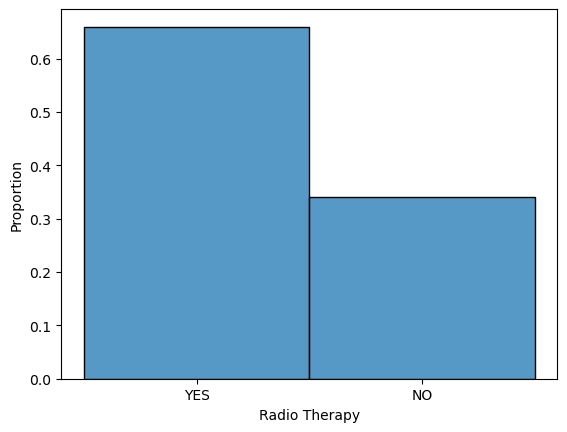

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp 

df = pd.read_csv('./data/metabric.csv')

y = df['Radio Therapy']
sns.histplot(y,stat='proportion')

The likelihood is 
$$
L(p) = \prod_{i=1}^n p^{y_i}(1-p)^{1-y_i}
$$

To maximize, we first take logs:
$$
\ell(p) = \sum_{i=1}^n y_i \log(p) + (1-y_i) \log(1-p)
$$
and
$$
\ell'(p) = \sum_{i=1}^n y_i \frac{1}{p} - (1-y_i) \frac{1}{1-p}
$$
At the optimum, we have
$$
\sum_{i=1}^n y_i \frac{1}{\hat{p}} - (1-y_i) \frac{1}{1-\hat{p}} = 0
$$
Solving the first-order condition for $p$ yields the MLE
$$
\hat{p} = \dfrac{1}{n} \sum_{i=1}^n y_i.
$$

MLE:  0.659717051377513


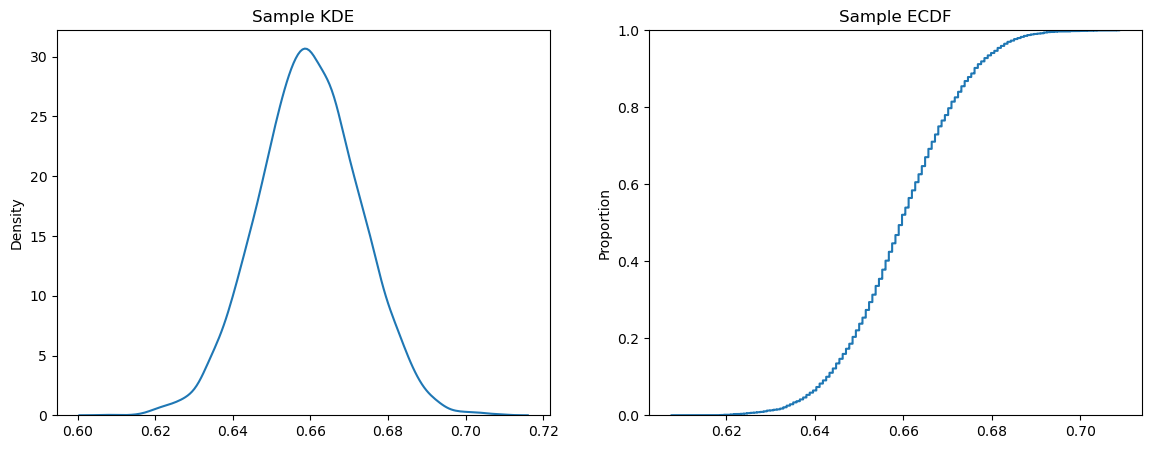

In [13]:
y = pd.to_numeric( y.replace({'NO':'0','YES':'1'}) , errors='coerce' ) # Convert string to numeric
print(f'MLE: ', y.mean())

S = 5000
sample = [ np.mean( y.sample(frac=1,replace=True) ) for s in range(S) ]

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sample ECDF')
plt.show()

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

<Axes: xlabel='price', ylabel='Proportion'>

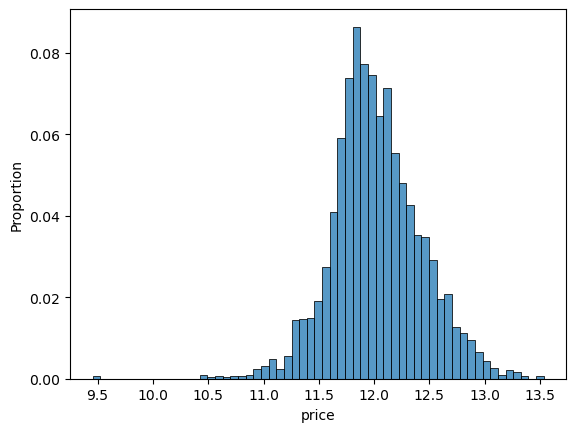

In [18]:
df = pd.read_csv('./data/ames_prices.csv')
y = np.log( df['price'] )
sns.histplot(y,stat='proportion')

After taking logs, this looks reasonably symmetric and bell-shaped around 12, so I'm going to model $\log(\text{price})$ as normal with mean $\mu$ and standard deviation $\sigma$. This means price is log-normally distributed, but we're going to focus on the logged version for the exercise.

Our density is
$$
f(y) = \dfrac{1}{\sqrt{2\pi} \sigma}e^{-\frac{1}{2}\left( \frac{y-\mu}{\sigma} \right)^2}
$$
and the likelihood is
$$
L(\mu, \sigma) = \prod_{i=1}^n \dfrac{1}{\sqrt{2\pi} \sigma}e^{-\frac{1}{2}\left( \frac{y_i-\mu}{\sigma} \right)^2}.
$$

To maximize the likelihood, we first take logs:
$$
\ell(\mu, \sigma) = \sum_{i=1}^n \log \left( \dfrac{1}{\sqrt{2\pi}}\right) - \log(\sigma) -\frac{1}{2}\left( \frac{y_i-\mu}{\sigma} \right)^2
$$
We then take the derivative with respect to each parameter:
$$
\dfrac{\partial \ell(\mu,\sigma)}{\partial \mu} = \sum_{i=1}^n  \frac{y_i-\mu}{\sigma^2}
$$
$$
\dfrac{\partial \ell(\mu,\sigma)}{\partial \sigma} = \sum_{i=1}^n  \frac{-1}{\sigma} +  \frac{(y_i-\mu)^2}{\sigma^3} 
$$
Setting these equal to zero and solving yields
$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^n y_i
$$
$$
\hat{\sigma} = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{\mu})^2 }
$$
So now, we have a fitted model: $y \sim N(\hat{\mu}, \hat{\sigma})$. Is it good? Does it fit?

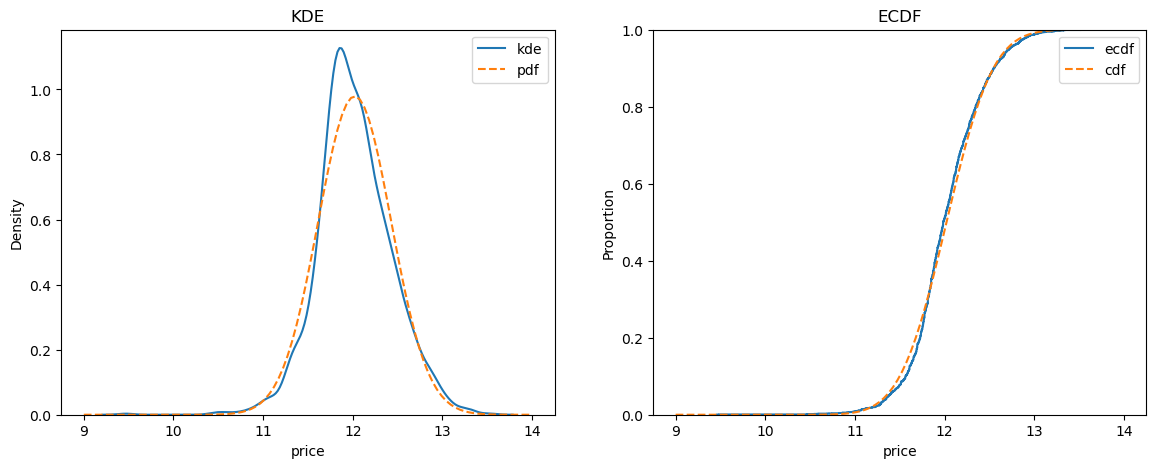

In [ ]:
mu_hat = np.mean(y)
sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )

grid = np.linspace(9,14,100)

pdf = sp.stats.norm.pdf(grid,loc=mu_hat,scale=sigma_hat)
cdf = sp.stats.norm.cdf(grid,loc=mu_hat,scale=sigma_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=y,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('KDE')
sns.ecdfplot(x=y,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('ECDF')
plt.show()

The fit of the ECDF looks rather good: The lines are right on top of one another. For the pdf, the data have a higher peak and seem to have a bit of left-ward skew. But they're bell-shaped and their tails die off rather quickly. A more formal approach to this would be to make a Quantile-Quantile plot to compare the distributions or a Kolmogorov-Smirnoff test of equality, but that's a little much for the moment.

Let's look at the sampling distribution of $\hat{\mu}$ and $\hat{\sigma}$.

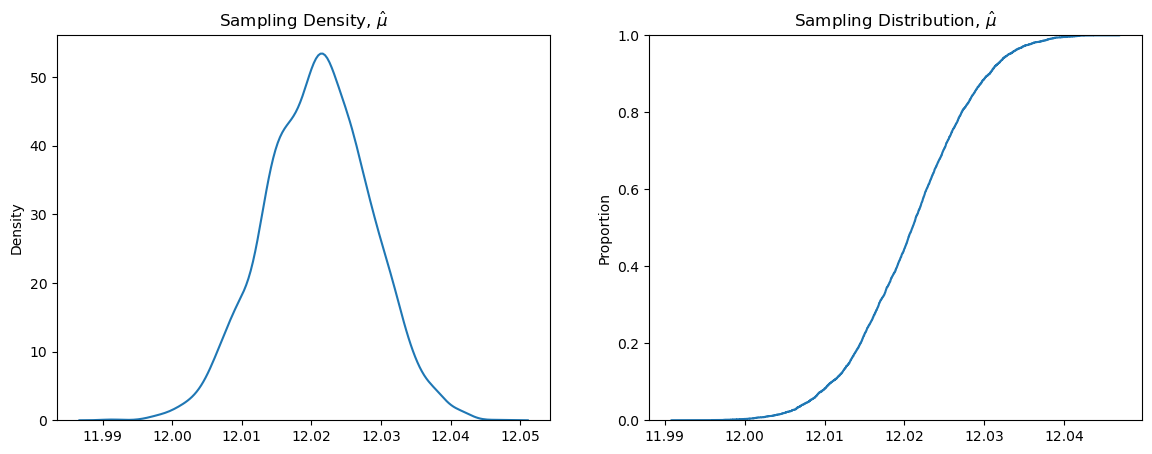

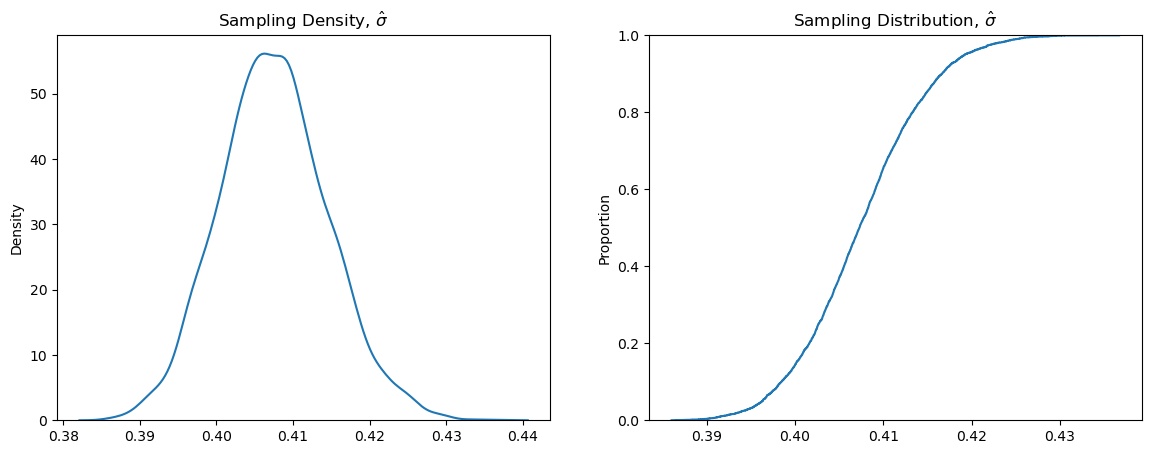

In [ ]:
# Estimation:
def mle(y):
    mu_hat = np.mean(y)
    sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )
    return mu_hat, sigma_hat

# Bootstrapping:
S = 5000
sample = [ mle(y.sample(frac=1.0,replace=True)) for s in range(S)]

# Sampling distributions:
mu_hat_sample = [ row[0] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=mu_hat_sample,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\mu}$')
sns.ecdfplot(x=mu_hat_sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\mu}$')
plt.show()

sigma_hat_samples = [ row[1] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sigma_hat_samples,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\sigma}$')
sns.ecdfplot(x=sigma_hat_samples,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\sigma}$')
plt.show()

This is great! We now have a completely fitted model, including the ability simulate it with $N(\hat{\mu},\hat{\sigma})$ (first-order uncertainty) and conduct inference on its sampling distribution (second-order uncertainty).

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.